In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold

In [2]:
train, valid, test = load_mnist_data()

Epoch 1 training complete
 evaluation data
    | Accuracy: 95.850000 
    | Cost:     0.618333

Epoch 2 training complete
 evaluation data
    | Accuracy: 97.050000 
    | Cost:     0.635996

Epoch 3 training complete
 evaluation data
    | Accuracy: 97.820000 
    | Cost:     0.647223

Epoch 4 training complete
 evaluation data
    | Accuracy: 97.900000 
    | Cost:     0.675172

Epoch 5 training complete
 evaluation data
    | Accuracy: 97.890000 
    | Cost:     0.681461

Epoch 6 training complete
 evaluation data
    | Accuracy: 97.980000 
    | Cost:     0.691108

Epoch 7 training complete
 evaluation data
    | Accuracy: 98.370000 
    | Cost:     0.685208

Epoch 8 training complete
 evaluation data
    | Accuracy: 98.180000 
    | Cost:     0.691579

Epoch 9 training complete
 evaluation data
    | Accuracy: 98.190000 
    | Cost:     0.695221

Epoch 10 training complete
 evaluation data
    | Accuracy: 98.170000 
    | Cost:     0.701207

Epoch 11 training complete
 evaluation 

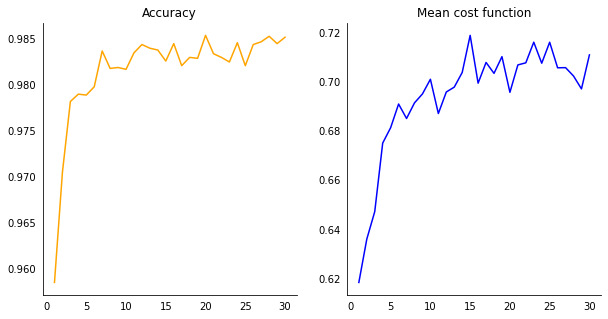

In [63]:
EPOCHS = 30
RS = None

start = time.time()
netw = net.Network([784, 100, 10], random_state=RS)
acc, cf = netw.SGD(train, .5, EPOCHS, 10, 4.2, evaluation_data=valid,
                                    monitor_evaluation_accuracy=True,
                                    monitor_evaluation_cost=True, 
                                    monitor_training_accuracy=False, 
                                    monitor_training_cost=False)
print("%s seconds" % (time.time()-start))
net.visualisation(acc, cf, EPOCHS)
# net.visualisation(acc_t, cf_t, EPOCHS)

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

In [59]:
def hyper_param_setting(training_data, valid_data, random_state, net_architecture, **sgd_params):
    main_param = {}
    for key, value in sgd_params.items():
        if (type(value) is list) or \
           (type(value) is tuple) or \
           (type(value) is np.ndarray):
           sgd_params.pop(key)
           main_param.update({key:value})
           print(f"Training by: {key}")
           break

    recreate_sgd_params = [{**sgd_params, key:value} for value in \
        list(main_param.values())[0]]

    results = []
    for params in recreate_sgd_params:
        nn = net.Network(net_architecture, random_state=random_state)
        res = nn.SGD(training_data=training_data, evaluation_data=valid_data, **params)
        results.append(res)

    return results, list(main_param.items())[0]

In [55]:
def comparing_hyper_params(hyper_param, accuracy_and_cost_results, figsize=(10, 5)):
    hp = hyper_param[0]
    values = hyper_param[1]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    for acc, cf in accuracy_and_cost_results:
        ax1.plot(acc)
        ax2.plot(cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        ax.legend([f"{hp}={value}" for value in values])
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

Training by: eta
Epoch 1 training complete
 evaluation data
    | Accuracy: 91.470000 
    | Cost:     0.716474

Epoch 2 training complete
 evaluation data
    | Accuracy: 91.740000 
    | Cost:     0.699055

Epoch 3 training complete
 evaluation data
    | Accuracy: 92.100000 
    | Cost:     0.698074

Epoch 4 training complete
 evaluation data
    | Accuracy: 92.270000 
    | Cost:     0.693217

Epoch 5 training complete
 evaluation data
    | Accuracy: 91.980000 
    | Cost:     0.700430

Epoch 6 training complete
 evaluation data
    | Accuracy: 92.520000 
    | Cost:     0.702535

Epoch 7 training complete
 evaluation data
    | Accuracy: 92.090000 
    | Cost:     0.700405

Epoch 8 training complete
 evaluation data
    | Accuracy: 92.250000 
    | Cost:     0.698105

Epoch 9 training complete
 evaluation data
    | Accuracy: 92.270000 
    | Cost:     0.707378

Epoch 10 training complete
 evaluation data
    | Accuracy: 92.130000 
    | Cost:     0.732400

Epoch 1 training compl

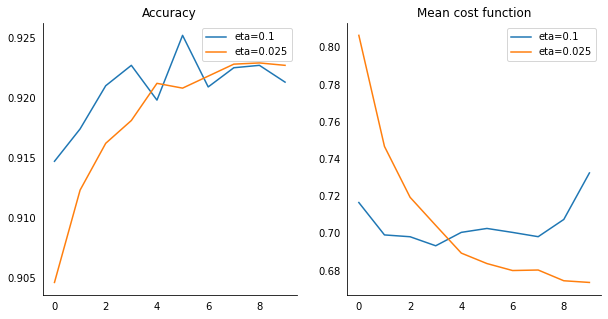

In [61]:
res = hyper_param_setting(
    training_data=train, 
    valid_data=valid, 
    random_state=42,
    net_architecture=[784, 10],

    # SGD params 
    eta=[0.1, 0.025], 
    mini_batch_size=10, 
    lmbda=4.2, 
    epochs=10,
    monitor_evaluation_cost=True, 
    )
comparing_hyper_params(res[1], res[0])

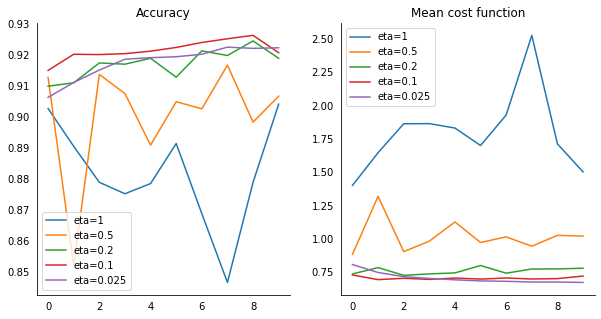